In [4]:
import tensorflow
tensorflow.__version__

'2.14.0'

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Check out the shape of the train and test set and make necessary changes if required. (Hint: Your X_train and X_test should have a shape like (None, 32,32,3) and you y_test and y_train must have a shape like (None, ). Note that "None" can be any integer for your data set) (5 points)




In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [10]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
y_test.shape

(10000, 1)

Plot the first image from the train set. What is the label for that image? (5 points)

In [12]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

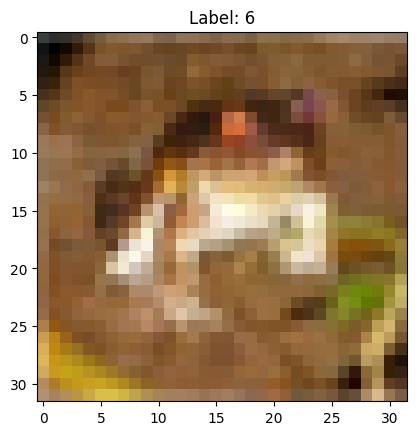

In [13]:
plt.imshow(x_train[0])
plt.title(f"Label: {y_train[0][0]}")
plt.show()

Make sure that the pixel values for X_train and X_set are normalized between 0 and 1. (5 points)

In [14]:
x_train = x_train / 255.0
x_test = x_test/ 255.0


In [15]:
x_train


array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

This is the time to make a decision for your target variable. Note that your target variable has 10 classes. You can either leave it as it is (integers between 0 and 9) or transform it to one-hot encoded target. Whatever you pick, please specify which loss function you should use down the road? (5 points)

I am deciding to leave it as integers between 0 and 9. The loss function I will want to use is 'SparseCategoricalCrossentropy' because it used when the labels are integers.

Question 2: Train the ANN model (20 points)

In [16]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [17]:
x_train.shape

(50000, 32, 32, 3)

In [18]:
def build_ann_model():
   inputs = keras.Input(shape=(x_train.shape[1:]), name= "my_input")
   flatten_inputs = layers.Flatten()(inputs)
   features = layers.Dense(512, activation='relu',   name='first_layer')(flatten_inputs)
   features = layers.Dense(256, activation='relu',   name='second_layer')(features)
   features = layers.Dense(256, activation='relu',   name='third_layer')(features)
   outputs   = layers.Dense(10,  activation='softmax',name='output_layer')(features)
   model = keras.Model(inputs=inputs, outputs=outputs)
   model.compile(optimizer='rmsprop', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
   return model



In [19]:
ann_models = build_ann_model()
ann_models.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 first_layer (Dense)         (None, 512)               1573376   
                                                                 
 second_layer (Dense)        (None, 256)               131328    
                                                                 
 third_layer (Dense)         (None, 256)               65792     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 1773066 (6.76 MB)
Trainable params: 1773066 (6.

In [20]:
early_stopping   = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model_checkpoint = ModelCheckpoint(monitor='val_loss', save_best_only=True, filepath="ann_model.h5")
callback_list    = [early_stopping,model_checkpoint]

In [21]:
ann_models.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=25, batch_size=64,
          callbacks=callback_list)

Epoch 1/25
782/782 [==============================] - 8s 5ms/step - loss: 1.9624 - accuracy: 0.2878 - val_loss: 2.0009 - val_accuracy: 0.2719
Epoch 2/25
 30/782 [>.............................] - ETA: 2s - loss: 1.7657 - accuracy: 0.3578

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - 3s 4ms/step - loss: 1.7234 - accuracy: 0.3835 - val_loss: 1.7743 - val_accuracy: 0.3537
Epoch 3/25
782/782 [==============================] - 3s 4ms/step - loss: 1.6360 - accuracy: 0.4169 - val_loss: 1.6564 - val_accuracy: 0.4053
Epoch 4/25
782/782 [==============================] - 4s 5ms/step - loss: 1.5756 - accuracy: 0.4376 - val_loss: 1.6692 - val_accuracy: 0.4129
Epoch 5/25
782/782 [==============================] - 3s 4ms/step - loss: 1.5344 - accuracy: 0.4534 - val_loss: 1.8436 - val_accuracy: 0.3828
Epoch 6/25
782/782 [==============================] - 3s 4ms/step - loss: 1.5048 - accuracy: 0.4647 - val_loss: 1.5981 - val_accuracy: 0.4399
Epoch 7/25
782/782 [==============================] - 4s 5ms/step - loss: 1.4760 - accuracy: 0.4770 - val_loss: 1.5298 - val_accuracy: 0.4549
Epoch 8/25
782/782 [==============================] - 4s 5ms/step - loss: 1.4575 - accuracy: 0.4818 - val_loss: 1.5451 - val_accuracy: 0.4535
Epoch 9/25
782/78

In [22]:
test_model = keras.models.load_model("ann_model.h5")
test_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5298 - accuracy: 0.4549


[1.5297924280166626, 0.45489999651908875]

Question 3: Train the CNN model (25 points)

In [37]:
def build_cnn_model():
    inputs= keras.Input(shape= x_train.shape[1:], name='Input layer')
    x = layers.Conv2D(filters= 32, kernel_size = 3, strides = (1,1) , padding='same',  activation='relu' ,name="conv_layer_1")(inputs)
    x = layers.MaxPool2D(pool_size=2, name="pooling_1")(x)
    x = layers.Conv2D(filters= 64, kernel_size = 3,  padding='same',activation='relu', name="conv_layer_2")(x)
    x = layers.MaxPool2D(pool_size=2, name="pooling_2")(x)
    x = layers.Conv2D(filters= 128, kernel_size = 3, padding='same', activation='relu', name="conv_layer_3")(x)
    x = layers.MaxPool2D(pool_size=2, name="pooling_3")(x)
    x = layers.Conv2D(filters= 256, kernel_size = 3, padding='same', activation='relu', name="conv_layer_4")(x)
    x = layers.Flatten(name="flattening_layer")(x)
    x = layers.Dense(units= 64, activation='relu')(x)
    outputs = layers.Dense(units= 10, activation='softmax', name='output_layer')(x)

    model = keras.Model(inputs= inputs , outputs=outputs, name='my_first_CNN_model')

    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [38]:
cnn_models = build_cnn_model()
cnn_models.summary()

Model: "my_first_CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 32, 32, 32)        896       
                                                                 
 pooling_1 (MaxPooling2D)    (None, 16, 16, 32)        0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 16, 16, 64)        18496     
                                                                 
 pooling_2 (MaxPooling2D)    (None, 8, 8, 64)          0         
                                                                 
 conv_layer_3 (Conv2D)       (None, 8, 8, 128)         73856     
                                                                 
 pooling_3 (MaxPooling2D)    (None, 4, 4, 128)  

In [39]:
early_stopping   = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model_checkpoint = ModelCheckpoint(monitor='val_loss', save_best_only=True, filepath="cnn_model.h5")

callback_list    = [early_stopping,model_checkpoint]

In [40]:
history1 = cnn_models.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64,
          callbacks=callback_list)

Epoch 1/20
782/782 [==============================] - 7s 7ms/step - loss: 1.6429 - accuracy: 0.4003 - val_loss: 1.2666 - val_accuracy: 0.5479
Epoch 2/20
 17/782 [..............................] - ETA: 5s - loss: 1.2362 - accuracy: 0.5570

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - 5s 6ms/step - loss: 1.1287 - accuracy: 0.5986 - val_loss: 1.2404 - val_accuracy: 0.5786
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 0.8904 - accuracy: 0.6861 - val_loss: 1.0671 - val_accuracy: 0.6297
Epoch 4/20
782/782 [==============================] - 5s 7ms/step - loss: 0.7341 - accuracy: 0.7433 - val_loss: 0.8175 - val_accuracy: 0.7179
Epoch 5/20
782/782 [==============================] - 4s 6ms/step - loss: 0.6048 - accuracy: 0.7869 - val_loss: 0.8720 - val_accuracy: 0.7069
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 0.4917 - accuracy: 0.8298 - val_loss: 0.8194 - val_accuracy: 0.7235
Epoch 7/20
782/782 [==============================] - 5s 7ms/step - loss: 0.3955 - accuracy: 0.8621 - val_loss: 0.9302 - val_accuracy: 0.7105
Epoch 8/20
782/782 [==============================] - 5s 6ms/step - loss: 0.3150 - accuracy: 0.8914 - val_loss: 1.1671 - val_accuracy: 0.6872
Epoch 9/20
782/78

In [41]:
test_model = keras.models.load_model("cnn_model.h5")
test_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8175 - accuracy: 0.7179


[0.8175109624862671, 0.7178999781608582]

Question 4: Train the CNN model with data augmentation (25 points)

In [28]:
def build_cnn_aug_model():
    data_augmentation = keras.Sequential([
        layers.experimental.preprocessing.RandomRotation(0.2),
         layers.experimental.preprocessing.RandomZoom(0.3),
         layers.experimental.preprocessing.RandomFlip("vertical")
    ], name="data_augmentation")

    inputs = keras.Input(shape=x_train.shape[1:], name='Input layer')
    x = data_augmentation(inputs)
    x = layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='same', activation='relu', name="conv_layer_1")(x)
    x = layers.MaxPool2D(pool_size=2, name="pooling_1")(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', name="conv_layer_2")(x)
    x = layers.MaxPool2D(pool_size=2, name="pooling_2")(x)
    x = layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', name="conv_layer_3")(x)
    x = layers.MaxPool2D(pool_size=2, name="pooling_3")(x)
    x = layers.Flatten(name="flattening_layer")(x)
    x = layers.Dense(units=64, activation='relu')(x)
    outputs = layers.Dense(units=10, activation='softmax', name='output_layer')(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='my_first_CNN__aug_model')

    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [29]:
model_augmented = build_cnn_aug_model()
model_augmented.summary()


Model: "my_first_CNN__aug_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 data_augmentation (Sequent  (None, 32, 32, 3)         0         
 ial)                                                            
                                                                 
 conv_layer_1 (Conv2D)       (None, 32, 32, 32)        896       
                                                                 
 pooling_1 (MaxPooling2D)    (None, 16, 16, 32)        0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 16, 16, 64)        18496     
                                                                 
 pooling_2 (MaxPooling2D)    (None, 8, 8, 64)          0         
                                           

In [30]:
early_stopping   = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model_checkpoint = ModelCheckpoint(monitor='val_loss', save_best_only=True, filepath="model_cnn_aug.h5")
callback_list    = [early_stopping,model_checkpoint]

In [31]:
history = model_augmented.fit(x=x_train, y=y_train, validation_data=(x_test, y_test),
          epochs=40, batch_size=128, callbacks=callback_list)

Epoch 1/40
391/391 [==============================] - 6s 10ms/step - loss: 2.0078 - accuracy: 0.2585 - val_loss: 1.7873 - val_accuracy: 0.3481
Epoch 2/40
391/391 [==============================] - 3s 8ms/step - loss: 1.7730 - accuracy: 0.3622 - val_loss: 1.6162 - val_accuracy: 0.4136
Epoch 3/40
391/391 [==============================] - 3s 9ms/step - loss: 1.6638 - accuracy: 0.4030 - val_loss: 1.6698 - val_accuracy: 0.4070
Epoch 4/40
391/391 [==============================] - 4s 9ms/step - loss: 1.5900 - accuracy: 0.4322 - val_loss: 1.4334 - val_accuracy: 0.4896
Epoch 5/40
391/391 [==============================] - 3s 8ms/step - loss: 1.5358 - accuracy: 0.4531 - val_loss: 1.4144 - val_accuracy: 0.4946
Epoch 6/40
391/391 [==============================] - 3s 9ms/step - loss: 1.4885 - accuracy: 0.4695 - val_loss: 1.3653 - val_accuracy: 0.5152
Epoch 7/40
391/391 [==============================] - 4s 10ms/step - loss: 1.4458 - accuracy: 0.4851 - val_loss: 1.4484 - val_accuracy: 0.4932
Epoc

In [32]:
test_model = keras.models.load_model("model_cnn_aug.h5")
test_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0595 - accuracy: 0.6379


[1.0594754219055176, 0.6378999948501587]


Question 5: Evaluate your best model (35 points)

For this question, go back and see which of the above models (ANN, CNN or CNN augmented) was the winner for the image classification task (hopefully one of your CNN models is the winner). Load that model and call it winning_model. (remember you have saved this before using Modelcheckpoint call back)  (5 points)

In [34]:
winning_model = keras.models.load_model("cnn_model.h5")

Report the model summary (winning_model.summary() ). How many parameters are there in the last convolutional layer in your winning model. Show me the breakdown of that number (ex: 3*3*3*50+50 = 1400) (5 points)

In [35]:
winning_model.summary()

Model: "my_first_CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 32, 32, 32)        896       
                                                                 
 pooling_1 (MaxPooling2D)    (None, 16, 16, 32)        0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 16, 16, 64)        18496     
                                                                 
 pooling_2 (MaxPooling2D)    (None, 8, 8, 64)          0         
                                                                 
 conv_layer_3 (Conv2D)       (None, 8, 8, 128)         73856     
                                                                 
 pooling_3 (MaxPooling2D)    (None, 4, 4, 128)  

(kernal * (channel depth of previous layer) +1 ) * channel depth of last layer

In [42]:
((3*3*128)+1)*256

295168

Plot the loss vs epoch for the train and validation set. At what epoch number does your model start overfitting? (5 points)

In [46]:
metrics = pd.DataFrame(history1.history)

In [47]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.642922,0.40028,1.266650,0.5479
1,1.128721,0.59856,1.240354,0.5786
2,0.890367,0.68606,1.067096,0.6297
3,0.734108,0.74328,0.817511,0.7179
4,0.604762,0.78692,0.871998,0.7069


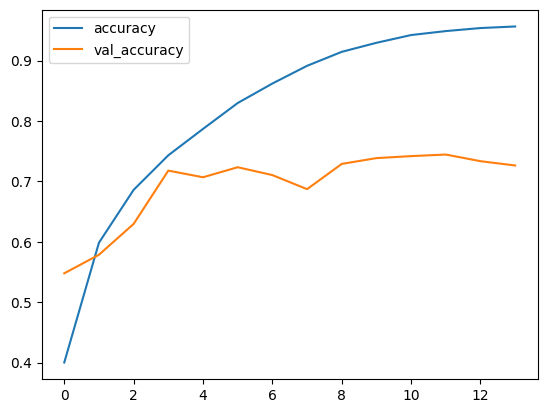

In [48]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

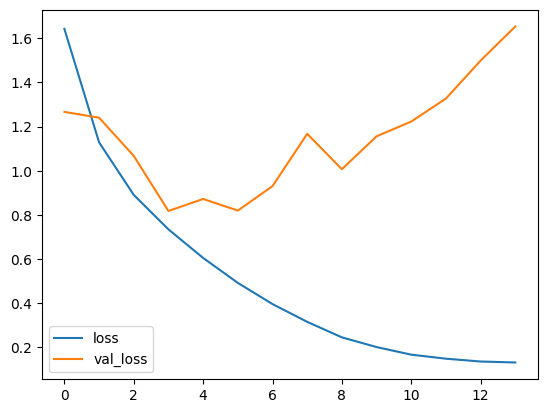

In [49]:
metrics[['loss','val_loss']].plot()
plt.show()

It looks like at around 5 epochs, the model starts to overfit. It's generalization to new, unseen data (validation set) starts to degrade after the 5th epoch.

Import classification_report and confusion_matrix from sklearn.metrics. Print out the classification report! Based on f1 score, which of the classes has the lowest f1 score? what does that mean?  (5 points)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [57]:
y_pred = winning_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 3ms/step


In [58]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1000
           1       0.87      0.82      0.84      1000
           2       0.59      0.70      0.64      1000
           3       0.54      0.55      0.55      1000
           4       0.71      0.70      0.70      1000
           5       0.69      0.57      0.63      1000
           6       0.68      0.87      0.76      1000
           7       0.73      0.82      0.77      1000
           8       0.92      0.74      0.82      1000
           9       0.83      0.80      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



Cat images have the lowest f1 score of .55. That means that cat images are the most difficult to predict correctly compared to other classes. That means there are alot more false positives and false negatives in predicting cat images.

Use seaborn.heatmap to visualize the confusion matrix. What are the classes that your model have hard time distinguishing them from each other? name 3 pair of classes.  (5 points)

In [59]:
confusion_matrix(y_test,y_pred_classes)

array([[742,  13,  88,  23,  24,   4,  26,  12,  29,  39],
       [ 11, 816,  16,  18,   6,   3,  29,   7,  16,  78],
       [ 34,   2, 704,  43,  70,  36,  68,  38,   1,   4],
       [ 11,   4,  98, 547,  59, 119,  82,  65,   2,  13],
       [  7,   1,  73,  63, 700,  25,  68,  58,   5,   0],
       [  3,   1,  81, 168,  41, 573,  48,  77,   1,   7],
       [  3,   0,  39,  47,  16,  12, 866,  15,   1,   1],
       [  6,   2,  36,  34,  54,  29,  19, 817,   0,   3],
       [ 65,  36,  36,  39,  14,   9,  35,   4, 739,  23],
       [ 18,  58,  16,  23,   4,  15,  26,  30,  11, 799]])

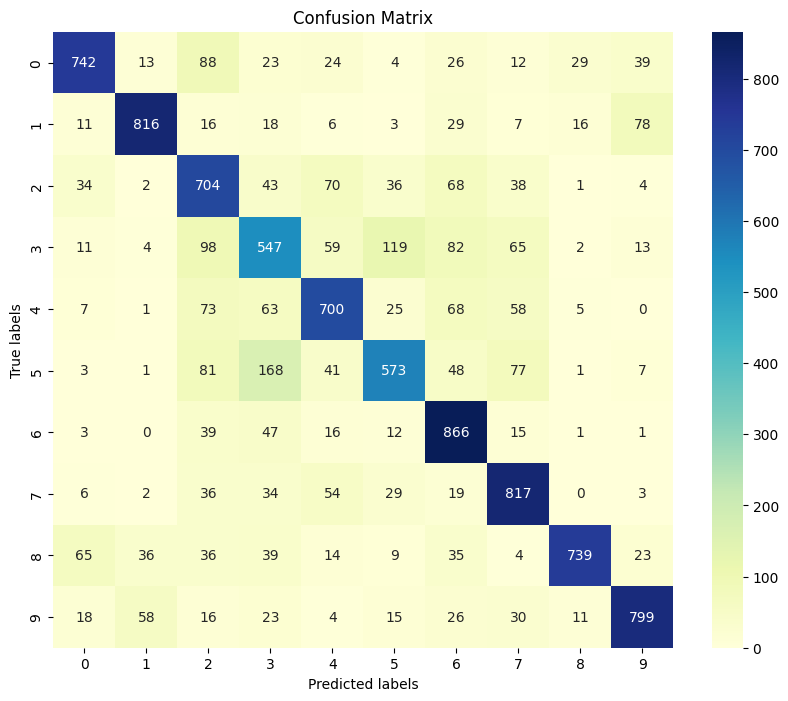

In [61]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred_classes),annot=True, cmap='YlGnBu',fmt='g')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

My model has a difficult time distinguishing between classes 3 and 5, classes 0 and 2, and classes 3 and 7.

Visualize the first 6 misclassifications of your winning model. (You can borrow from code from the notebook we covered in class). (5 points)

In [70]:
if y_test.ndim == 2:
    y_test_indices = np.argmax(y_test, axis=1)
else:
    y_test_indices = y_test

# Identify misclassified indices
misclassified_idx = np.where(y_pred_classes != y_test_indices)[0]

print(f"Total misclassified images: {len(misclassified_idx)}")

Total misclassified images: 9100


In [75]:
print("y_test shape:", y_test.shape)
print("First 10 y_test values:", y_test[:10])

print("\ny_pred_classes shape:", y_pred_classes.shape)
print("First 10 y_pred_classes values:", y_pred_classes[:10])

y_test shape: (10000, 1)
First 10 y_test values: [[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]

y_pred_classes shape: (10000,)
First 10 y_pred_classes values: [3 8 8 8 6 6 1 6 3 9]


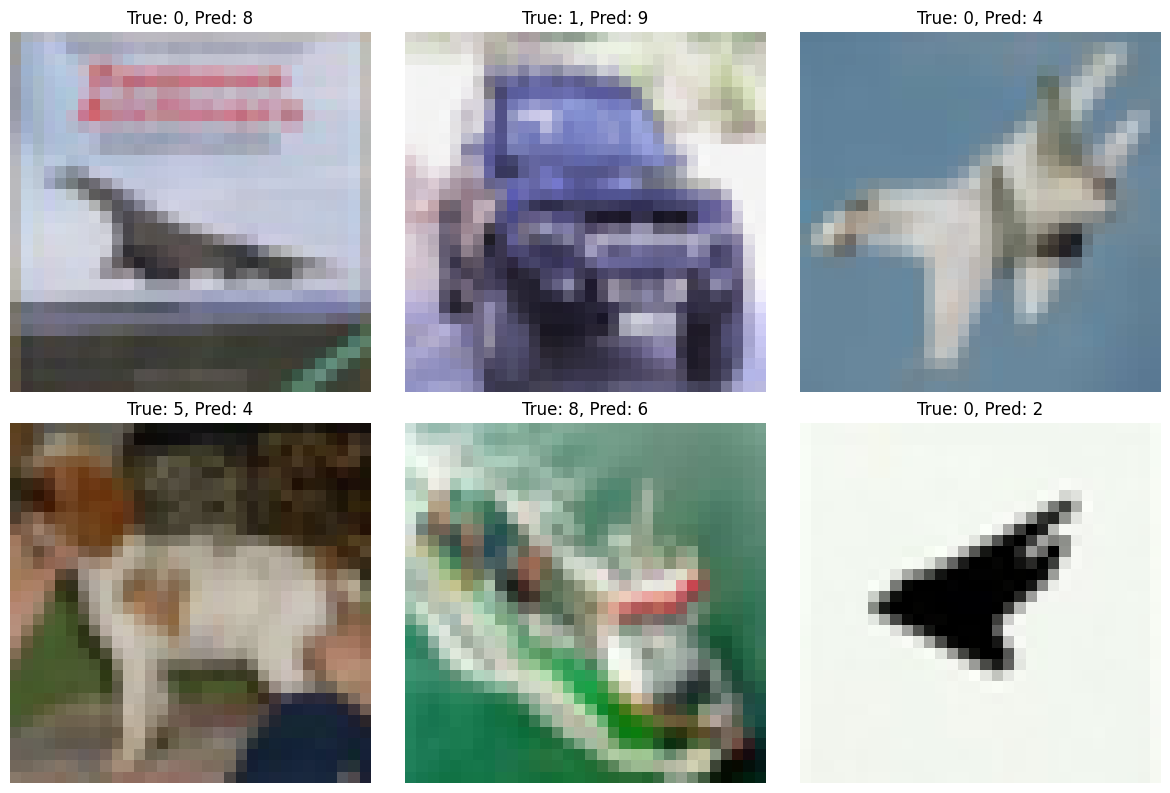

In [76]:
misclassified_idx = np.where(y_pred_classes != y_test[:, 0])[0]  # The [0] is to reshape y_test from (10000, 1) to (10000,)

# Display the first 6 misclassified images
plt.figure(figsize=(12, 8))
for i, idx in enumerate(misclassified_idx[:6]):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True: {y_test[idx][0]}, Pred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

When I first looked at these misclassified images, I also did not know for sure what 4 of the 6 images were. I correctly classified the dog and boat images.